In [44]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def reaction(y, t, kf, kr):
    A, B, C, D = y
    dAdt = -(kr+2*kf)* A + kr * B + kf * C + kr * D
    dBdt = -(kr+kf)* B + kf * A  + kr * C
    dCdt = -(kf+2*kr)* C + kr * A + kf * D + kf * B
    dDdt = -(kf+kr)* D + kr * C + kf * A
    return [dAdt, dBdt, dCdt, dDdt]

y0 = [0.08235294, 0.09411765, .12941176, 0.09411765]


abserr = 2
relerr = 2
stoptime = 50
numpoints = 250
t = np.linspace(0, stoptime, numpoints)
kf = 5
kr = 1

F_values = [] 
trace_of_rho= []
time_and_F_values = []

p= odeint(reaction, y0, t, args=(kf, kr), atol=abserr, rtol=relerr)

s = odeint(reaction, p[-1], t, args=(kf, kr), atol=abserr, rtol=relerr)


for idx, (A, B, C,D) in enumerate(s):
    J = np.array([[-(2*kf+kr), kr,kf,kr], 
                  [kf, -(kf+kr),kr, 0],
                  [kr,kf, -(kf+2*kr),kf],
                  [kf,0,kr,-(kf+kr)]])
    rates =np.array([[-(kr+2*kf)* A + kr * B + kf * C + kr * D],
                     [-(kr+kf)* B + kf * A  + kr * C], 
                     [-(kf+2*kr)* C + kr * A + kf * D + kf * B],
                     [-(kf+kr)* D + kr * C + kf * A]])
    norm = np.linalg.norm(rates)
    normalized_rates = rates / (norm)
    row_matrix = normalized_rates.T
    print(norm)

    rho = normalized_rates @ row_matrix
    r = np.trace(rho)

    F = np.trace(J @ J.T @ rho) - (np.trace(J @ rho)) ** 2
    F_values.append(F)
    trace_of_rho.append(r)
    
    time_and_F_values.append((t[idx], F))  # Store time and F_values as a tuple

# Accessing F_values at specific times
desired_times = t  # Specify the times you're interested in
for time in desired_times:
    closest_time_idx = np.abs(t - time).argmin()
    F_at_desired_time = time_and_F_values[closest_time_idx][1]
    print(f"F_values at time {time}: {F_at_desired_time}")

# Plotting and other code remains unchanged


3.688309490807512e-11
4.488567637516721e-05
9.280186217986392e-05
0.00014071804798446917
0.00018863423378935205
0.0002365504195939765
0.0002844666053987534
0.0003323827912035761
0.0003802989770081879
0.0004282151628128871
0.0004761313486176597
0.0005240475344222426
0.0005719637202269521
0.0006198799060318225
0.0006677960918365274
0.000715712277641329
0.0007636284634459491
0.0008115446492507217
0.0008594608350553779
0.0009073770208599955
0.0009552932066648125
0.001003209392469492
0.0010511255782742084
0.0010990417640790917
0.001146957949883598
0.00119487413568823
0.0012427903214930142
0.0012907065072977192
0.0013386226931023195
0.0013865388789070117
0.0014344550647117785
0.0014823712505164835
0.0015302874363212733
0.0015782036221260649
0.0016261198079307814
0.001674035993735455
0.0017219521795401429
0.0017698683653448407
0.0018177845511495457
0.0018657007369544045
0.0019136169227590538
0.001961533108563757
0.0020094492943683708
0.002057365480173247
0.002105281665977847
0.002153197851782

In [45]:
steady_state_concentrations = p[-1]
print("Steady State Concentrations: ", steady_state_concentrations)


Steady State Concentrations:  [0.08 0.09 0.14 0.09]


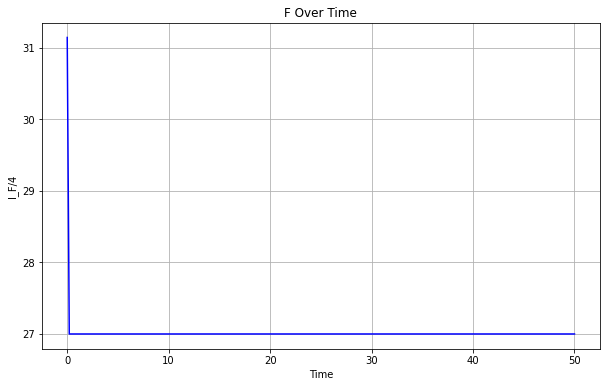

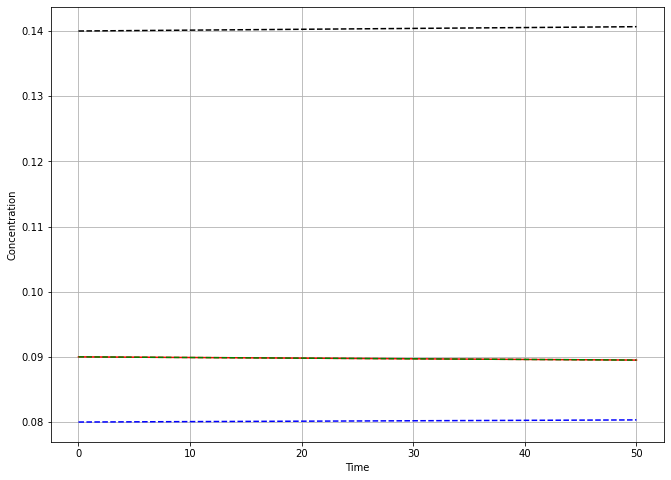

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(t, F_values, label='F over time', color='blue', linestyle='-', markersize=5)
plt.xlabel('Time')
plt.ylabel('I_F/4')
plt.title('F Over Time')
#plt.ylim(3.5,4.5)
plt.grid()

plt.figure(figsize=(11, 8))
plt.plot(t, s[:,0],'--', color='blue',label = 'A')
plt.plot(t, s[:,1], color='red',label = 'B')
plt.plot(t, s[:,2],'--', color='k',label = 'C')
plt.plot(t, s[:,3],'--', color='g',label = 'C')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.grid()
plt.show()
